In [132]:
%run ../odr_v3.1.ipynb
import matplotlib
matplotlib.rc('font', size=24) 
%run ../arr2table_v4.0.ipynb


# NTC

In [133]:
T_NTC,R=txt2arr("NTC")
R_err=10
T25=298.15
R25=10000
T0=273.15
B=3988

def ntc_func(T):
    T=T+T0
    return R25*np.exp(-B*(1/T25-1/T))
T_theo=np.linspace(min(T_NTC),max(T_NTC),10000)
R_theo=ntc_func(T_theo)

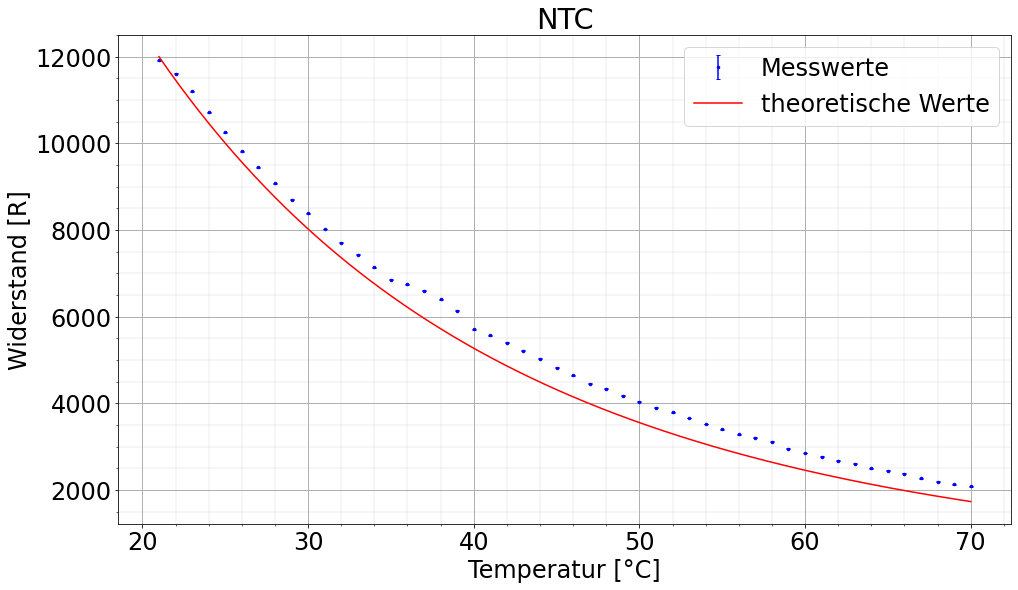

In [159]:
plt.errorbar(x=T_NTC,y=R,yerr=R_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
plt.errorbar(x=T_theo,y=R_theo,fmt='-',c='r',capsize=2,ms=5,label="theoretische Werte")
plt.ylabel("Widerstand [R]")
plt.xlabel("Temperatur [°C]")
#plt.yscale("log")
draw("NTC",size=np.array([16,9])*1)
save("NTC")

In [135]:
align='c'
head=["Temperatur [°C]","Widerstand [R]"]
val=[T_NTC,R]
err=[0,R_err] 
cap="NTC Werte"
lab=""
nk=[1,0]
print(table(align,head,val,err,cap,lab,nk,longtable=True,copy=False))

\begin{longtable}{c|c} 
 
\caption{NTC Werte}\\ 
 
Temperatur [°C]	 &Widerstand [R]	 \\\hline\hline
\endfirsthead 
 
\caption{Fortsetzung NTC Werte}\\ 
 
Temperatur [°C]	 &Widerstand [R]	 \\\hline\hline
\endhead
\hline
\multicolumn{2}{r}{Weiter auf der n{"a}chsten Seite}\
\endfoot\hline
\multicolumn{2}{r}{Ende} \
\endlastfoot
 
21.0	&11910$\pm$10	\\ 
22.0	&11600$\pm$10	\\ 
23.0	&11200$\pm$10	\\ 
24.0	&10710$\pm$10	\\ 
25.0	&10250$\pm$10	\\ 
26.0	&9810$\pm$10	\\ 
27.0	&9450$\pm$10	\\ 
28.0	&9080$\pm$10	\\ 
29.0	&8700$\pm$10	\\ 
30.0	&8380$\pm$10	\\ 
31.0	&8020$\pm$10	\\ 
32.0	&7700$\pm$10	\\ 
33.0	&7430$\pm$10	\\ 
34.0	&7140$\pm$10	\\ 
35.0	&6850$\pm$10	\\ 
36.0	&6740$\pm$10	\\ 
37.0	&6600$\pm$10	\\ 
38.0	&6400$\pm$10	\\ 
39.0	&6130$\pm$10	\\ 
40.0	&5710$\pm$10	\\ 
41.0	&5570$\pm$10	\\ 
42.0	&5400$\pm$10	\\ 
43.0	&5210$\pm$10	\\ 
44.0	&5030$\pm$10	\\ 
45.0	&4820$\pm$10	\\ 
46.0	&4640$\pm$10	\\ 
47.0	&4450$\pm$10	\\ 
48.0	&4330$\pm$10	\\ 
49.0	&4170$\pm$10	\\ 
50.0	&4030$\pm$10	\\ 
51.0	

# Zweiwegeregler

In [136]:
xlabel_zwr="Zeit [s]"
ylabel_zwr="Temperatur [°C]"
size=np.array([16,6])*1.2

## ohne Hysterese (3.2)

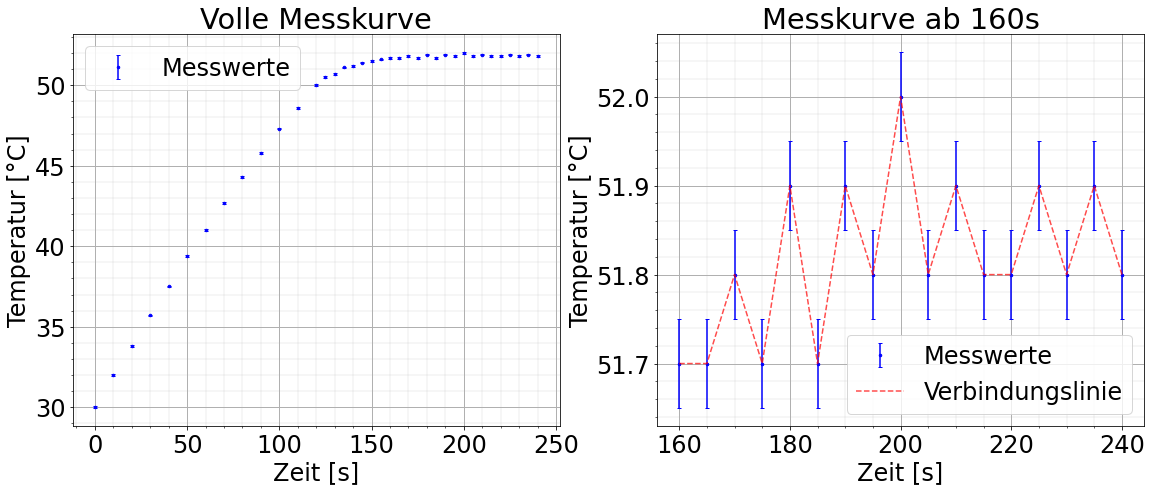

In [137]:
t_oh,T_oh=txt2arr("3.2")
T_oh_err=0.05

plt.subplot(121)
plt.errorbar(x=t_oh,y=T_oh,yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Volle Messkurve")
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
ab=20
plt.errorbar(x=t_oh[ab:],y=T_oh[ab:],yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
plt.errorbar(x=t_oh[ab:],y=T_oh[ab:],fmt='--',c='r',capsize=2,ms=5,label="Verbindungslinie",alpha=0.7)
draw("Messkurve ab 160s",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)
save("zwr_oh")

In [138]:
align='c'
head=[xlabel_zwr,ylabel_zwr]
val=[t_oh,T_oh]
err=[0,T_oh_err] 
cap="zwr ohne Hysterese"
lab=""
nk=[0,1]
table_oh=table(align,head,val,err,cap,lab,nk,longtable=False,copy=False)

## mit Hysterese (3.3)

### R=100kOhm

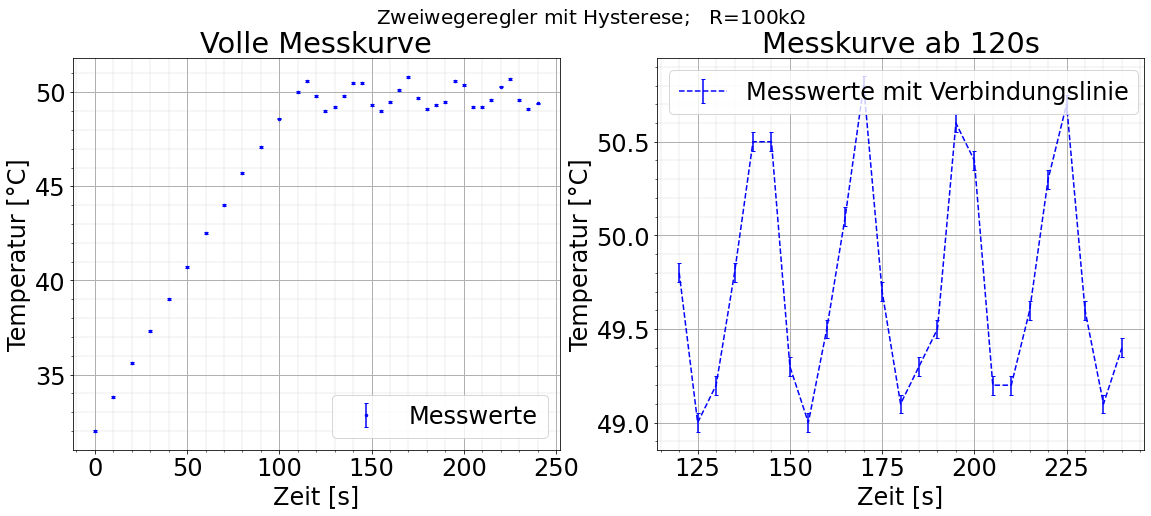

In [139]:
t_h_100,T_h_100=txt2arr("3.3.100")

plt.subplot(121)
plt.errorbar(x=t_h_100,y=T_h_100,yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Volle Messkurve")
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_h_100[13:],y=T_h_100[13:],yerr=T_oh_err,fmt='--',c='b',capsize=2,ms=5,label="Messwerte mit Verbindungslinie")
#plt.ylim(48,51)
draw("Messkurve ab 120s",size=size,loc='upper left')
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.suptitle("Zweiwegeregler mit Hysterese;   R=100k$\Omega$",fontsize=20)
save("zwr_h_100")

### R=20kOhm

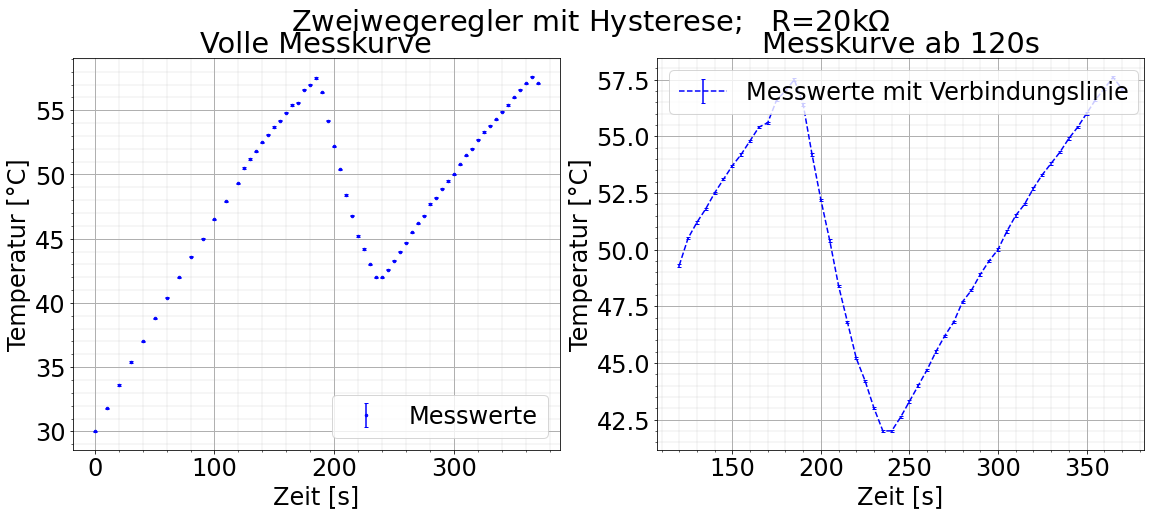

In [140]:
t_h_20,T_h_20=txt2arr("3.3.20")

plt.subplot(121)
plt.errorbar(x=t_h_20,y=T_h_20,yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Volle Messkurve")
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_h_20[12:],y=T_h_20[12:],yerr=T_oh_err,fmt='--',c='b',capsize=2,ms=5,label="Messwerte mit Verbindungslinie")
#plt.ylim(48,51)
draw("Messkurve ab 120s",size=size,loc='upper left')
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.suptitle("Zweiwegeregler mit Hysterese;   R=20k$\Omega$")
save("zwr_h_20")

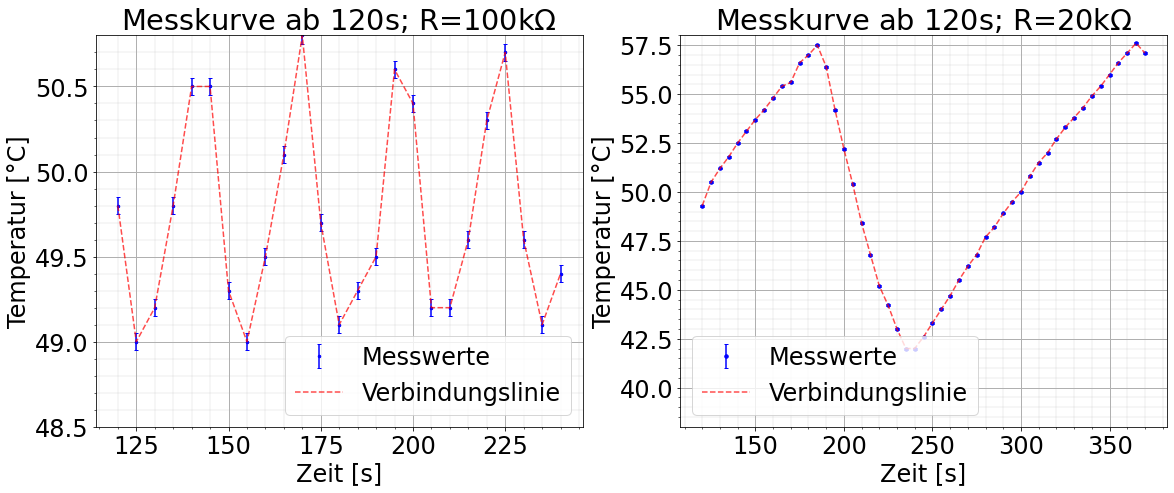

In [141]:
plt.subplot(121)
plt.errorbar(x=t_h_100[13:],y=T_h_100[13:],yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
plt.errorbar(x=t_h_100[13:],y=T_h_100[13:],fmt='--',c='r',capsize=2,ms=5,label="Verbindungslinie",alpha=0.7)
#plt.ylim(48,51)
draw("Messkurve ab 120s; R=100k$\Omega$",size=size,loc='lower right')
plt.ylim(48.5,50.8)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_h_20[12:],y=T_h_20[12:],yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=7,label="Messwerte")
plt.errorbar(x=t_h_20[12:],y=T_h_20[12:],fmt='--',c='r',capsize=2,ms=5,label="Verbindungslinie",alpha=0.7)
plt.ylim(38,58)
draw("Messkurve ab 120s; R=20k$\Omega$",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)
save("zwr_h_ab120")

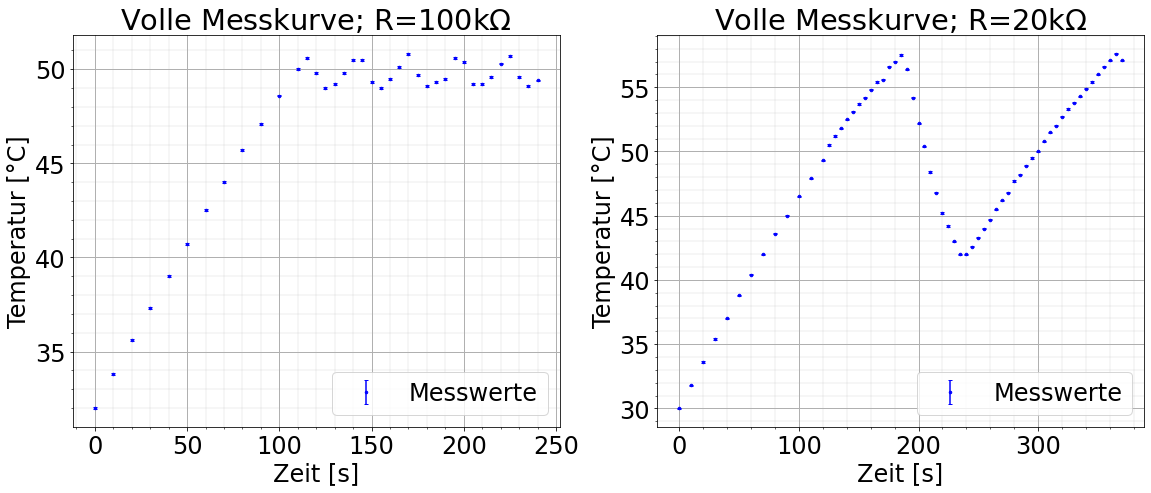

In [142]:
plt.subplot(121)
plt.errorbar(x=t_h_100,y=T_h_100,yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
#plt.ylim(48,51)
draw("Volle Messkurve; R=100k$\Omega$",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_h_20,y=T_h_20,yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
#plt.ylim(48,51)
draw("Volle Messkurve; R=20k$\Omega$",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)
save("zwr_h_ab0")

In [143]:
align='c'
head=[xlabel_zwr,ylabel_zwr]
val=[t_h_100,T_h_100]
err=[0,T_oh_err] 
cap="zwr mit H. R=100"
lab=""
nk=[0,1]
table_h_100=table(align,head,val,err,cap,lab,nk,longtable=False,copy=False)

In [144]:
align='c'
head=[xlabel_zwr,ylabel_zwr]
val=[t_h_20,T_h_20]
err=[0,T_oh_err] 
cap="zwr mit H. R=20"
lab=""
nk=[0,1]
table_h_20=table(align,head,val,err,cap,lab,nk,longtable=False,copy=False)

In [145]:
print(minipage([table_oh,table_h_100,table_h_20],["Regler ohne Hysterese",r"Hysterese mit 100\,k$\Omega$",r"Hysterese mit 20\,k$\Omega$"]))

\begin{minipage}[t]{0.3225806451612903\textwidth}
	\captionsetup{type=figure}
	\centering
		\captionof{table}{Regler ohne Hysterese}
\begin{tabular}{c|c} 
Zeit [s]	 &Temperatur [°C]	 \\\hline
0	&30.0$\pm$0.1	\\ 
10	&32.0$\pm$0.1	\\ 
20	&33.8$\pm$0.1	\\ 
30	&35.7$\pm$0.1	\\ 
40	&37.5$\pm$0.1	\\ 
50	&39.4$\pm$0.1	\\ 
60	&41.0$\pm$0.1	\\ 
70	&42.7$\pm$0.1	\\ 
80	&44.3$\pm$0.1	\\ 
90	&45.8$\pm$0.1	\\ 
100	&47.3$\pm$0.1	\\ 
110	&48.6$\pm$0.1	\\ 
120	&50.0$\pm$0.1	\\ 
125	&50.5$\pm$0.1	\\ 
130	&50.7$\pm$0.1	\\ 
135	&51.1$\pm$0.1	\\ 
140	&51.2$\pm$0.1	\\ 
145	&51.4$\pm$0.1	\\ 
150	&51.5$\pm$0.1	\\ 
155	&51.6$\pm$0.1	\\ 
160	&51.7$\pm$0.1	\\ 
165	&51.7$\pm$0.1	\\ 
170	&51.8$\pm$0.1	\\ 
175	&51.7$\pm$0.1	\\ 
180	&51.9$\pm$0.1	\\ 
185	&51.7$\pm$0.1	\\ 
190	&51.9$\pm$0.1	\\ 
195	&51.8$\pm$0.1	\\ 
200	&52.0$\pm$0.1	\\ 
205	&51.8$\pm$0.1	\\ 
210	&51.9$\pm$0.1	\\ 
215	&51.8$\pm$0.1	\\ 
220	&51.8$\pm$0.1	\\ 
225	&51.9$\pm$0.1	\\ 
230	&51.8$\pm$0.1	\\ 
235	&51.9$\pm$0.1	\\ 
240	&51.8$\pm$0.1	
\end{tab

# P-Regler

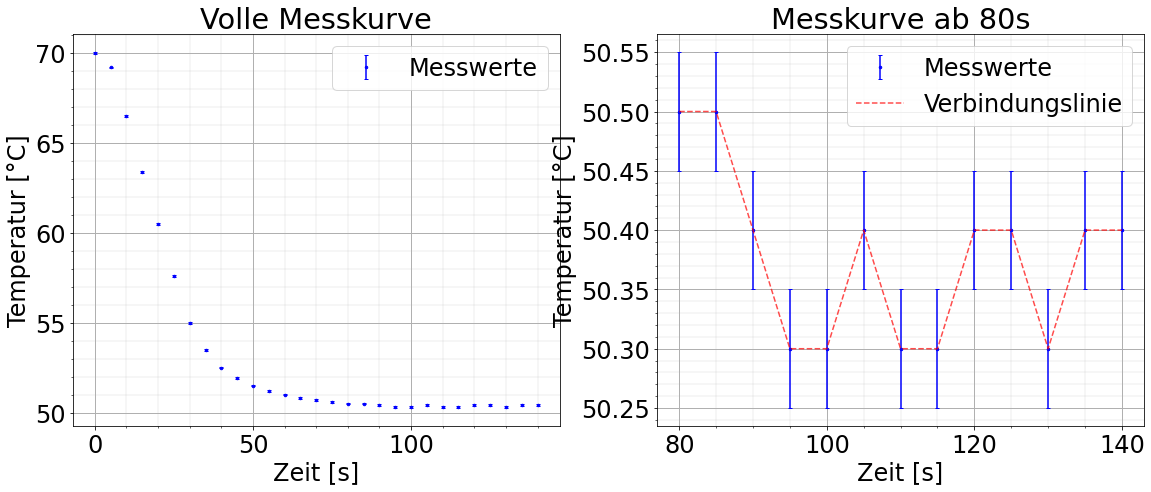

In [146]:
t_p,T_p=txt2arr("3.4")
T_p_err=0.05

plt.subplot(121)
plt.errorbar(x=t_p,y=T_p,yerr=T_p_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Volle Messkurve")
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
ab=16
plt.errorbar(x=t_p[16:],y=T_p[16:],yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
plt.errorbar(x=t_p[16:],y=T_p[16:],fmt='--',c='r',alpha=0.7,capsize=2,ms=5,label="Verbindungslinie")
draw("Messkurve ab 80s",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

save("p-regler")

In [147]:
align='c'
head=[xlabel_zwr,ylabel_zwr]
val=[t_p,T_p]
err=[0,T_oh_err] 
cap="P-Regler"
lab=""
nk=[0,1]
table_p=table(align,head,val,err,cap,lab,nk,longtable=False,copy=False)
print(table_p)

\begin{table}[H] 
\centering 
\caption{P-Regler} 
\begin{tabular}{c|c} 
Zeit [s]	 &Temperatur [°C]	 \\\hline
0	&70.0$\pm$0.1	\\ 
5	&69.2$\pm$0.1	\\ 
10	&66.5$\pm$0.1	\\ 
15	&63.4$\pm$0.1	\\ 
20	&60.5$\pm$0.1	\\ 
25	&57.6$\pm$0.1	\\ 
30	&55.0$\pm$0.1	\\ 
35	&53.5$\pm$0.1	\\ 
40	&52.5$\pm$0.1	\\ 
45	&51.9$\pm$0.1	\\ 
50	&51.5$\pm$0.1	\\ 
55	&51.2$\pm$0.1	\\ 
60	&51.0$\pm$0.1	\\ 
65	&50.8$\pm$0.1	\\ 
70	&50.7$\pm$0.1	\\ 
75	&50.6$\pm$0.1	\\ 
80	&50.5$\pm$0.1	\\ 
85	&50.5$\pm$0.1	\\ 
90	&50.4$\pm$0.1	\\ 
95	&50.3$\pm$0.1	\\ 
100	&50.3$\pm$0.1	\\ 
105	&50.4$\pm$0.1	\\ 
110	&50.3$\pm$0.1	\\ 
115	&50.3$\pm$0.1	\\ 
120	&50.4$\pm$0.1	\\ 
125	&50.4$\pm$0.1	\\ 
130	&50.3$\pm$0.1	\\ 
135	&50.4$\pm$0.1	\\ 
140	&50.4$\pm$0.1	
\end{tabular} 
\end{table}


# PI-Regler

## C=100µF

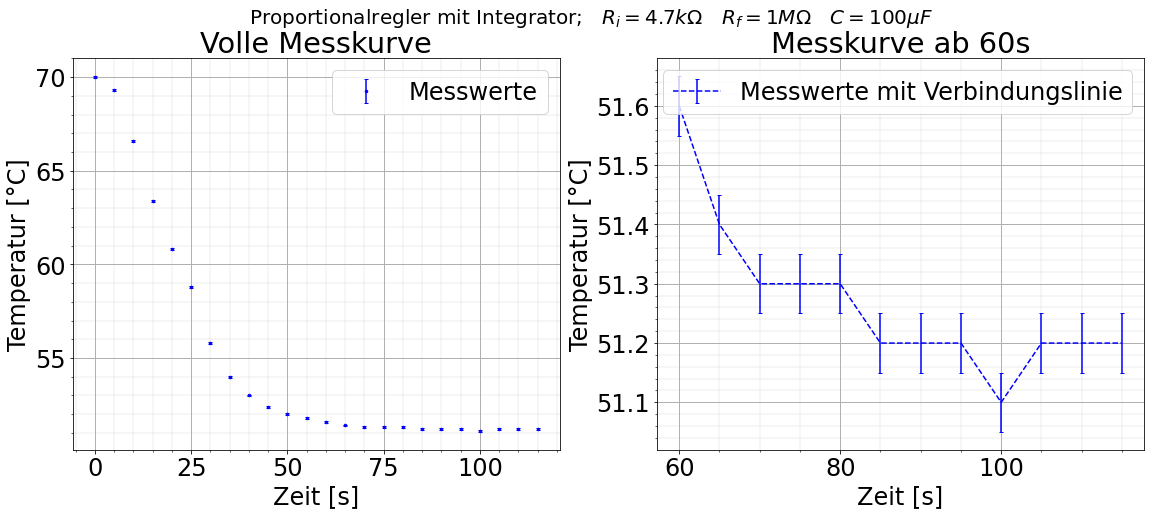

In [148]:
t_pi_100,T_pi_100=txt2arr("3.5.100")
T_pi_err=0.05

plt.subplot(121)
plt.errorbar(x=t_pi_100,y=T_pi_100,yerr=T_pi_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Volle Messkurve",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_pi_100[12:],y=T_pi_100[12:],yerr=T_oh_err,fmt='--',c='b',capsize=2,ms=5,label="Messwerte mit Verbindungslinie")
draw("Messkurve ab 60s",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.suptitle("Proportionalregler mit Integrator;   $R_i=4.7k\Omega \quad R_f=1M\Omega \quad C=100µF$",fontsize=20)
save("pi-regler_100")

In [149]:
align='c'
head=[xlabel_zwr,ylabel_zwr]
val=[t_pi_100,T_pi_100]
err=[0,T_oh_err] 
cap="PI-Regler 100µF"
lab=""
nk=[0,1]
table_pi100=table(align,head,val,err,cap,lab,nk,longtable=False,copy=False)

## C=10µF

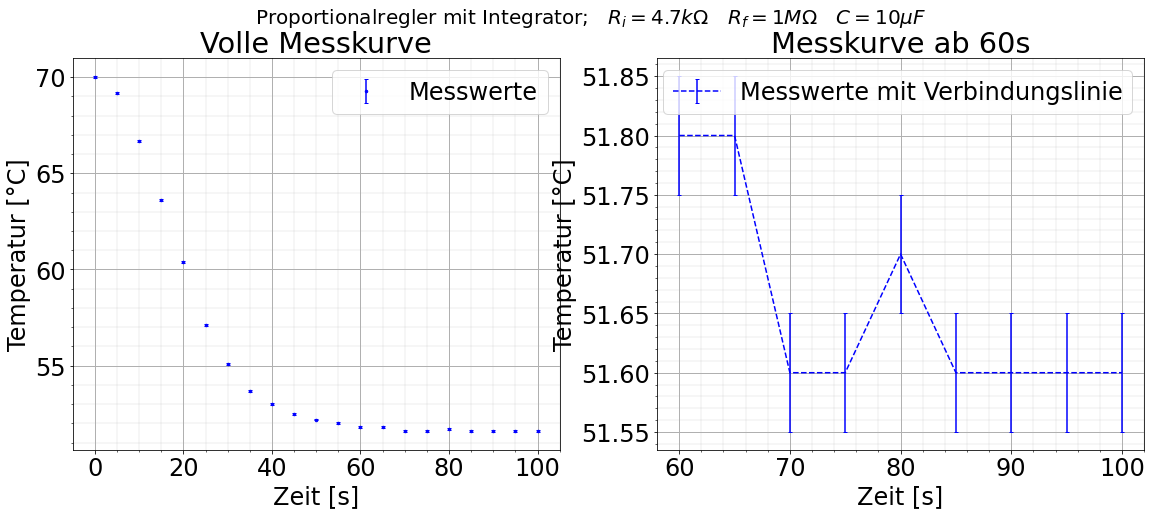

In [150]:
t_pi_10,T_pi_10=txt2arr("3.5.10")
T_pi_err=0.05

plt.subplot(121)
plt.errorbar(x=t_pi_10,y=T_pi_10,yerr=T_pi_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Volle Messkurve",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_pi_10[12:],y=T_pi_10[12:],yerr=T_oh_err,fmt='--',c='b',capsize=2,ms=5,label="Messwerte mit Verbindungslinie")
draw("Messkurve ab 60s",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.suptitle("Proportionalregler mit Integrator;   $R_i=4.7k\Omega \quad R_f=1M\Omega \quad C=10µF$",fontsize=20)
save("pi-regler_10")

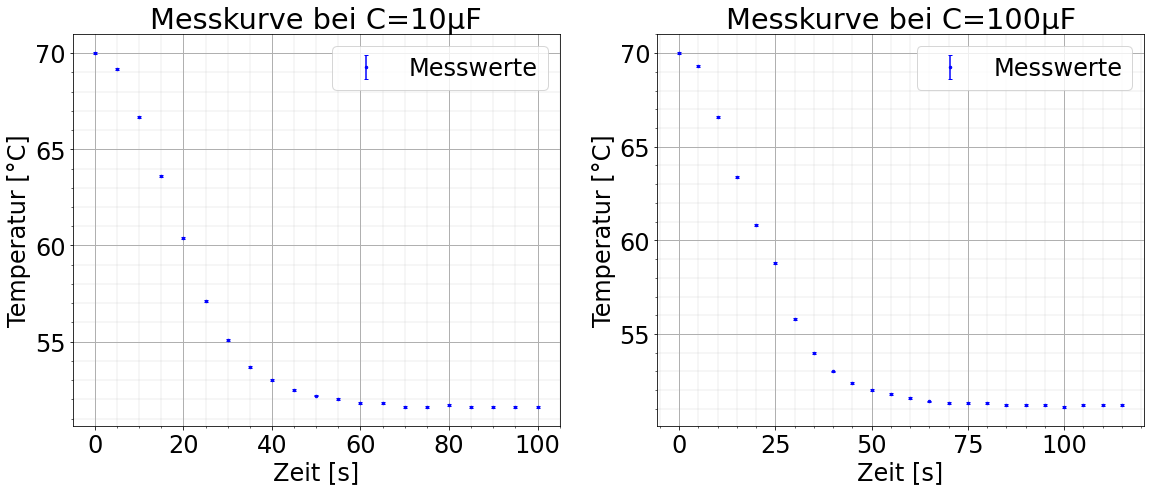

In [151]:
plt.subplot(121)
plt.errorbar(x=t_pi_10,y=T_pi_10,yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Messkurve bei C=10µF",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_pi_100,y=T_pi_100,yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Messkurve bei C=100µF",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

save("pi_ab0")

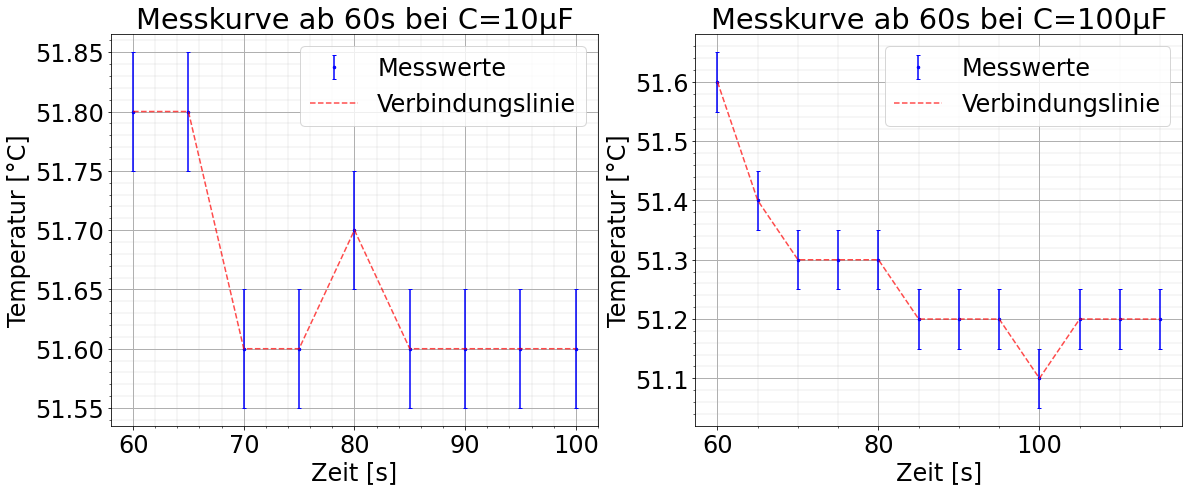

In [152]:
plt.subplot(121)
plt.errorbar(x=t_pi_10[12:],y=T_pi_10[12:],yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
plt.errorbar(x=t_pi_10[12:],y=T_pi_10[12:],fmt='--',c='r',alpha=0.7,capsize=2,ms=5,label="Verbindungslinie")

draw("Messkurve ab 60s bei C=10µF",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_pi_100[12:],y=T_pi_100[12:],yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
plt.errorbar(x=t_pi_100[12:],y=T_pi_100[12:],fmt='--',c='r',alpha=0.7,capsize=2,ms=5,label="Verbindungslinie")


draw("Messkurve ab 60s bei C=100µF",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

save("pi_ab60")

In [153]:
align='c'
head=[xlabel_zwr,ylabel_zwr]
val=[t_pi_100,T_pi_100]
err=[0,T_oh_err] 
cap="PI-Regler 10µF"
lab=""
nk=[0,1]
table_pi10=table(align,head,val,err,cap,lab,nk,longtable=False,copy=False)

In [154]:
print(minipage([table_pi100,table_pi10],["PI-Regler 100µF","PI-Regler 10µF"]))

\begin{minipage}[t]{0.47619047619047616\textwidth}
	\captionsetup{type=figure}
	\centering
		\captionof{table}{PI-Regler 100µF}
\begin{tabular}{c|c} 
Zeit [s]	 &Temperatur [°C]	 \\\hline
0	&70.0$\pm$0.1	\\ 
5	&69.3$\pm$0.1	\\ 
10	&66.6$\pm$0.1	\\ 
15	&63.4$\pm$0.1	\\ 
20	&60.8$\pm$0.1	\\ 
25	&58.8$\pm$0.1	\\ 
30	&55.8$\pm$0.1	\\ 
35	&54.0$\pm$0.1	\\ 
40	&53.0$\pm$0.1	\\ 
45	&52.4$\pm$0.1	\\ 
50	&52.0$\pm$0.1	\\ 
55	&51.8$\pm$0.1	\\ 
60	&51.6$\pm$0.1	\\ 
65	&51.4$\pm$0.1	\\ 
70	&51.3$\pm$0.1	\\ 
75	&51.3$\pm$0.1	\\ 
80	&51.3$\pm$0.1	\\ 
85	&51.2$\pm$0.1	\\ 
90	&51.2$\pm$0.1	\\ 
95	&51.2$\pm$0.1	\\ 
100	&51.1$\pm$0.1	\\ 
105	&51.2$\pm$0.1	\\ 
110	&51.2$\pm$0.1	\\ 
115	&51.2$\pm$0.1	
\end{tabular}
\end{minipage}
\quad
\begin{minipage}[t]{0.47619047619047616\textwidth}
	\captionsetup{type=figure}
	\centering
		\captionof{table}{PI-Regler 10µF}
\begin{tabular}{c|c} 
Zeit [s]	 &Temperatur [°C]	 \\\hline
0	&70.0$\pm$0.1	\\ 
5	&69.3$\pm$0.1	\\ 
10	&66.6$\pm$0.1	\\ 
15	&63.4$\pm$0.1	\\ 
20	&60.